##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_orders=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_orders_dataset.csv')
data_customers=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_customers_dataset.csv')
data_items=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_order_items_dataset.csv')
data_payments=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_order_payments_dataset.csv')
data_reviews=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_order_reviews_dataset.csv')
data_products=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_products_dataset.csv')
data_sellers=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_sellers_dataset.csv')
data_category=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/product_category_name_translation.csv')
data_geo=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_geolocation_dataset.csv')

## **Observations**

In [ ]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data_payments[data_payments['payment_sequential']>20].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
27824,285c2e15bebd4ac83635ccc563dc71f4,22,voucher,1,1.05
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [ ]:
data_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data_items['order_item_id'].value_counts()

In [ ]:
data_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data_reviews.shape

(100000, 7)

In [ ]:
data_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In order to get a better sight of the variables in each datset, we are going to create a tablea which gathers all the useful informations

- data type	
- unique values
- Nans percentage
- shape

In [ ]:
dict_data={'orders':data_orders,'items':data_items,'products':data_products,'payments':data_payments,'sellers':data_sellers,
           'reviews':data_reviews,'geo_localisation':data_geo,'categories':data_category,'customers':data_customers}
tableau=pd.DataFrame()
for data in dict_data:
  types=dict_data[data].dtypes
  for index,value in zip(types.index.tolist(),types.values.tolist()):
    tableau=tableau.append(pd.DataFrame({
        'dataset':data,
        'columns':index,
        'data_type':value,
        'nunique':[dict_data[data][index].nunique()],
        'nan_percentage':[round((dict_data[data][index].isna().sum()/len(dict_data[data][index]))*100)],
        'shape':[dict_data[data].shape]
    }))

tableau.reset_index(drop=False,inplace=True)
tableau.drop('index',axis=1,inplace=True)



In [ ]:
tableau

,dataset,columns,data_type,nunique,nan_percentage,shape
0,orders,order_id,object,99441,0,"(99441, 8)"
1,orders,customer_id,object,99441,0,"(99441, 8)"
2,orders,order_status,object,8,0,"(99441, 8)"
3,orders,order_purchase_timestamp,object,98875,0,"(99441, 8)"
4,orders,order_approved_at,object,90733,0,"(99441, 8)"
5,orders,order_delivered_carrier_date,object,81018,2,"(99441, 8)"
6,orders,order_delivered_customer_date,object,95664,3,"(99441, 8)"
7,orders,order_estimated_delivery_date,object,459,0,"(99441, 8)"
8,items,order_id,object,98666,0,"(112650, 7)"
9,items,order_item_id,int64,21,0,"(112650, 7)"


Next, we are going to check the values range in each dataset variable

In [ ]:
def check_values(dict_df):

  result=pd.DataFrame()
  for data in dict_df:
    numeric_col=dict_df[data].select_dtypes(include=np.number).columns.tolist()
    for col in numeric_col:
      result=result.append(pd.DataFrame({
        'dataset':data,
        'columns':col,
        'Min_value':[dict_df[data][col].min()],
        'Max_value':[dict_df[data][col].max()],
        'Mean_value':[dict_df[data][col].mean()],
        'Q1_value':[dict_df[data][col].quantile(0.25)],
        'Q3_value':[dict_df[data][col].quantile(0.75)]
        
      }))

  return result

In [ ]:
check_values(dict_data)

,dataset,columns,Min_value,Max_value,Mean_value,Q1_value,Q3_value
0,items,order_item_id,1.000000,21.000000,1.197834,1.000000,1.000000
0,items,price,0.850000,6735.000000,120.653739,39.900000,134.900000
0,items,freight_value,0.000000,409.680000,19.990320,13.080000,21.150000
0,products,product_name_lenght,5.000000,76.000000,48.476949,42.000000,57.000000
0,products,product_description_lenght,4.000000,3992.000000,771.495285,339.000000,972.000000
0,products,product_photos_qty,1.000000,20.000000,2.188986,1.000000,3.000000
0,products,product_weight_g,0.000000,40425.000000,2276.472488,300.000000,1900.000000
0,products,product_length_cm,7.000000,105.000000,30.815078,18.000000,38.000000
0,products,product_height_cm,2.000000,105.000000,16.937661,8.000000,21.000000
0,products,product_width_cm,6.000000,118.000000,23.196728,15.000000,30.000000


#### Observations

**orders** : 

- 5 time features that we need to convert into a Timestamp Format
- we have 8 order_status Categories

**items** :

- order_item_id: 21 ???
- shipping_limit_date to covert (Timestamp)
- check difference between order id count in orders and items

**products** :

- too much categories: mapping of categories

**payments** :

- 29 types of sequential payments seems a lot (outliers detection)
- 24 payment instalmments (can be categorized)
- check difference in order id count between payments and orders

**customers** :

- customers states to categorize

- check customers unique id mentioned more than once

**categories**

- check the difference between products category(73) and categories (71)

**geolocation** 

- use this feature to get the distance between the seller and customer

## **Data cleaning**

### Orders

In [ ]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_hour,estimated_delivery_days,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,15,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20,19,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,26,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19,26,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21,12,2.0


**order_purchase_timestamp** : this variable inform us about the customer convenience to purchase an item which will gave us an idea on when to advertise some products 

**order_approved_at** and **order_estimated_delivery_date** will gave us an idea on how the client respond to delivery time(long/short period)

other carrier information could be useful in clients segmentation

**Action**: add two features: 

- hour of the day on which the client passed the order

- number of days between the purchase date and the estimated delivery 

- number of days betwwen the purchase date and the actual delivery

In [ ]:
pip install pendulum

     |████████████████████████████████| 163kB 4.3MB/s 
     |████████████████████████████████| 491kB 5.7MB/s 


In [ ]:
import pendulum
def orders_infos(df):

  df['order_purchase']= df['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(x))
  df['order_delivered_customer_date']= df['order_delivered_customer_date'].apply(lambda x: pd.to_datetime(x))
  df['order_estimated_delivery_date']= df['order_estimated_delivery_date'].apply(lambda x: pd.to_datetime(x))

  hours=df['order_purchase'].apply(lambda x: x.hour)
  days=df['order_purchase'].apply(lambda x: x.day_name())
  weeks=df['order_purchase_timestamp'].apply(lambda x: pendulum.parse(x).week_of_month)
  estimated_delivery=(df['order_estimated_delivery_date']-df['order_purchase']).apply(lambda x: x.days)
  delivery_days=(df['order_delivered_customer_date']-df['order_purchase']).apply(lambda x: x.days)
  orders=df['order_id'].values.tolist()
  customers=df['customer_id'].values.tolist()
  
  result=pd.DataFrame({'order_id':orders,
                       'customer_id':customers,
                       'purchase_hour':hours,
                       'purchase_day':days,
                       'week_of_month':weeks,
                       'estimated_delivery_days':estimated_delivery,
                       'delivery_days':delivery_days})
  return result

### products

In [ ]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data_products['product_category_name'].nunique()


73

In [ ]:
data_category.shape

(71, 2)

The main idea for this dataset would be to categorize each feature into groups:

- first, we have extra category values in the product data that we need to check

- convert each portugues name to english one, then Map them into main categories

- merge product description (name_length,description_length,photos_qt) into one category or map each description separatly

- categorize the technical descriptions (weight, lengh, width,height) into a size category

In [ ]:
def nan_percentage(df):
  missing_data=df.isnull().sum().sort_values(ascending=False).reset_index()
  missing_data.columns=["feature","percentage_nan"]
  missing_data["percentage_nan"]=round((missing_data["percentage_nan"]/df.shape[0])*100)

  return missing_data

In [ ]:
nan_percentage(data_products)

,feature,percentage_nan
0,product_photos_qty,2.0
1,product_description_lenght,2.0
2,product_name_lenght,2.0
3,product_category_name,2.0
4,product_width_cm,0.0
5,product_height_cm,0.0
6,product_length_cm,0.0
7,product_weight_g,0.0
8,product_id,0.0


Check extra values in categories

In [ ]:
portugues_list1=data_products['product_category_name'].unique().tolist()
portugues_list2=data_category['product_category_name'].unique().tolist()

In [ ]:
extra_categories=[val for val in portugues_list1 if val not in portugues_list2]
extra_categories

['other', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos']

In [ ]:
data_category.loc[71,'product_category_name']='pc_gamer'
data_category.loc[72,'product_category_name']='portateis_cozinha_e_preparadores_de_alimentos'
data_category.loc[71,'product_category_name_english']='pc_gamer'
data_category.loc[72,'product_category_name_english']='kitchen_and_prepars_of_food'
data_category.loc[73,'product_category_name_english']='other'
data_category.loc[73,'product_category_name']='other'


In [ ]:
data_category.tail()

,product_category_name,product_category_name_english
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer
72,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_prepars_of_food
73,other,other


replace portugues catgories to english categories

join the two dataframes

In [ ]:
data_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,english_category_name,main_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,leisure
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,children
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,appliance
...,...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor,home_furniture
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights,tools
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table,home_furniture
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,electronics


In [ ]:
main_categories_dict={#Beauty_fashion
                      'health_beauty':'beauty',
                      'perfumery':'beauty',
                      'watches_gifts':'beauty',
                      'fashion_shoes':'beauty',
                      'fashion_male_clothing':'beauty',
                      'fashion_underwear_beach':'beauty',
                      'fashion_sport':'beauty',
                      'fashio_female_clothing':'beauty',
                      'fashion_bags_accessories':'beauty',
                      
                      #electronics
                      'computers_accessories':'electronics',
                      'telephony':'electronics',
                      'tablets_printing_image':'electronics',
                      'consoles_games':'electronics',
                      'fixed_telephony':'electronics',
                      'electronics':'electronics',
                      'computers':'electronics',
                      'pc_gamer':'electronics',
                      
                      #leisure
                      'sports_leisure':'leisure',
                      'cool_stuff':'leisure',
                      'musical_instruments':'leisure',
                      'art':'leisure',
                      'music':'leisure',
                      'cds_dvds_musicals':'leisure',
                      'dvds_blu_ray':'leisure',
                      'audio':'leisure',
                      'books_technical':'leisure',
                      'books_general_interest':'leisure',
                      'books_imported':'leisure',
                      'cine_photo':'leisure',
                      'arts_and_craftmanship':'beauty',

                      #home_furniture
                      'bed_bath_table':'home_furniture',
                      'furniture_decor':'home_furniture',
                      'flowers':'home_furniture',
                      'kitchen_dining_laundry_garden_furniture':'home_furniture',
                      'furniture_living_room':'home_furniture',
                      'furniture_mattress_and_upholstery':'home_furniture',
                      'furniture_bedroom':'home_furniture',
                      'la_cuisine':'home_furniture',
                      'home_comfort_2':'home_furniture',                      
                      'home_confort':'home_furniture',
                      'air_conditioning':'home_furniture',
                      'party_supplies':'home_furniture',
                      'christmas_supplies':'home_furniture',
                      'kitchen_and_prepars_of_food':'home_furniture',

                      #appliances
                      'home_appliances':'appliance',
                      'signaling_and_security':'appliance',
                      'home_appliances_2':'appliance',
                      'housewares':'appliance',
                      'small_appliances':'appliance',
                      'small_appliances_home_oven_and_coffee':'appliance',
                     
                      #tools
                      'garden_tools':'tools',
                      'construction_tools_construction':'tools',
                      'costruction_tools_garden':'tools',
                      'costruction_tools_tools':'tools',
                      'home_construction':'tools',
                      'construction_tools_lights':'tools',
                      'construction_tools_safety':'tools',
                               
                      #food
                      'food_drink':'food',
                      'food':'food',
                      'drinks':'food',

                      #children
                      'baby':'children',
                      'toys':'children',
                      'pet_shop':'children',
                      'diapers_and_hygiene':'children',
                      'fashion_childrens_clothes':'children',
                      
                      #other
                      'luggage_accessories':'other',
                      'auto':'other',
                      'market_place':'other',
                      'other':'other',

                      #office
                      'office_furniture':'office',
                      'stationery':'office',
                      'agro_industry_and_commerce':'office', 
                      'industry_commerce_and_business':'office',
                      'security_and_services':'office'
 
 }

In [ ]:
def products_infos(df):
  #fill description variables
  df['product_photos_qty'].fillna(0,inplace=True)
  df['product_description_lenght'].fillna(0,inplace=True)
  df['product_name_lenght'].fillna(0,inplace=True)

  #fill missing categories with other
  df['product_category_name'].fillna('other',inplace=True)

  #add missing values to categories datset
  data_category.loc[71,'product_category_name']='pc_gamer'
  data_category.loc[72,'product_category_name']='portateis_cozinha_e_preparadores_de_alimentos'
  data_category.loc[71,'product_category_name_english']='pc_gamer'
  data_category.loc[72,'product_category_name_english']='kitchen_and_prepars_of_food'
  data_category.loc[73,'product_category_name_english']='other'
  data_category.loc[73,'product_category_name']='other'

  #join products and category datset
  df=df.set_index('product_category_name').join(data_category.set_index('product_category_name')).reset_index()

  #map main categories
  df['main_category']=df['product_category_name_english'].map(main_categories_dict)

  return df


### Items

check payment values between items dataset and payment dataset

In [3]:
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
data_payments.shape

(103886, 5)

check most common orders

In [5]:
data_items[data_items['order_id']=='428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22


In [6]:
data_payments[data_payments['order_id']=='428a2f660dc84138d969ccd69a0ab6d5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
17373,428a2f660dc84138d969ccd69a0ab6d5,1,credit_card,10,1225.65


As we can see, in the **item dataset** from a single **order_id** we can extract several informations such us: 

- the number of items ordered
- sellers related to this order
- most common product
- and most common seller 


In [ ]:
from scipy import stats

def items_infos(df_item,df_orders,df_products): 

  items_number=df_item.groupby(['order_id']).apply(lambda x: x['product_id'].nunique())
  sellers_number=df_item.groupby(['order_id']).apply(lambda x: x['seller_id'].nunique())
  common_product=df_item.groupby(['order_id']).apply(lambda x: stats.mode(x['product_id'])[0][0])
  common_seller=df_item.groupby(['order_id']).apply(lambda x: stats.mode(x['seller_id'])[0][0])
        
  result=pd.DataFrame({'items_number':items_number.values.tolist(),
                       'sellers_number':sellers_number.values.tolist(),
                       'product_id':common_product,
                       'most_common_seller':common_seller
                       }).join(df_orders.set_index('order_id')[['customer_id']]).reset_index().set_index('product_id')
  result=result.join(df_products.set_index('product_id')[['main_category']])

  return result.reset_index().drop('product_id',axis=1)

### payments

In [ ]:
data_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
data_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
data_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

from the **payment_dataset**, the main informations to provide are:

- most common payment method
- mean payment 
- max payment (in case of a single command)
- payment seqences 



In [ ]:
def payments_infos(df_payment,df_orders):

  #extract useful informations
  common_payment=df_payment.groupby('order_id').apply(lambda x: stats.mode(x['payment_type'])[0][0])
  moy_payments=df_payment.groupby('order_id').apply(lambda x: x['payment_value'].mean())
  max_payments=df_payment.groupby('order_id').apply(lambda x: x['payment_value'].max())
  payment_sequences=df_payment.groupby('order_id').apply(lambda x: x['payment_sequential'].max() if len(x)>1 else x['payment_installments'].max())

  df=pd.DataFrame({'common_payment_method':common_payment.values.tolist(),
                   'mean_payments':moy_payments.values.tolist(),
                   'max_payment':max_payments.values.tolist(),
                   'payment_ease':payment_sequences
                       }).join(df_orders.set_index('order_id')[['customer_id']]).reset_index()

   
  return df

###geolocation

In [ ]:
data_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
data_geo.shape

(1000163, 5)

In [9]:
data_geo.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717358
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

As we can see for a single **geolocation_zip_code_prefix** we have several values to Latitude and longitude. the Idea is to take the mean for each variable 

then we set for each zip_code the state and the longitude and latitude related

In [ ]:
def geo_infos(df):

  state=df.groupby('geolocation_zip_code_prefix').apply(lambda x: x['geolocation_state'].unique()[0])
  zip_code_lat=df.groupby('geolocation_zip_code_prefix').apply(lambda x: x['geolocation_lat'].mean())
  zip_code_long=df.groupby('geolocation_zip_code_prefix').apply(lambda x: x['geolocation_lng'].mean())

  df=pd.DataFrame({'geolocation_zip_code_prefix': state.index.tolist(),
                   'state':state.values.tolist(),
                   'geolocation_lat':zip_code_lat.values.tolist(),
                   'geolocation_lng':zip_code_long.values.tolist()
                       })

  return df


In [ ]:
data_geo

,geolocation_zip_code_prefix,state,geolocation_lat,geolocation_lng
0,1001,SP,-23.550190,-46.634024
1,1002,SP,-23.548146,-46.634979
2,1003,SP,-23.548994,-46.635731
3,1004,SP,-23.549799,-46.634757
4,1005,SP,-23.549456,-46.636733
...,...,...,...,...
19010,99960,RS,-27.953722,-52.025511
19011,99965,RS,-28.183372,-52.039850
19012,99970,RS,-28.343766,-51.874689
19013,99980,RS,-28.389129,-51.843836


### customers

In [ ]:
data_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


According to each customer_zip_code_prefix we will set the related longitude and latitude

we will use informations from the geo_datset

In [ ]:
def customers_infos(df_customer,df_geo):

  df=df_customer.drop(['customer_unique_id','customer_city'],axis=1)
  df=df.rename({'customer_zip_code_prefix':'geolocation_zip_code_prefix'},axis=1)
  df=df.set_index('geolocation_zip_code_prefix').join(df_geo.set_index('geolocation_zip_code_prefix')[['geolocation_lat','geolocation_lng']]).reset_index()
  
  
  return df

### sellers

In [ ]:
data_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Same transformation as the customer_dataset

For each seller we will add the location variables 

This well help us get the distance between the seller and the customer 

In [ ]:
def sellers_info(df_seller,df_geo):

  df=df_seller.drop(['seller_city'],axis=1)
  df=df.rename({'seller_zip_code_prefix':'geolocation_zip_code_prefix'},axis=1)
  df=df.set_index('geolocation_zip_code_prefix').join(df_geo.set_index('geolocation_zip_code_prefix')[['geolocation_lat','geolocation_lng']]).reset_index()
  df=df.rename({'geolocation_lat':'geolocation_lat_seller',	'geolocation_lng':'geolocation_lng_seller'},axis=1)
  
  
  return df.drop(['geolocation_zip_code_prefix','seller_state'],axis=1)



In [ ]:
sellers_info(data_sellers)

,geolocation_zip_code_prefix,seller_id,seller_state,geolocation_lat,geolocation_lng
0,1001,8602a61d680a10a82cceeeda0d99ea3d,SP,-23.550190,-46.634024
1,1021,e0487761face83d64fcada2408959a36,SP,-23.543000,-46.632143
2,1021,dd55f1bb788714a40e7954c3be6df745,SP,-23.543000,-46.632143
3,1022,09bad886111255c5b5030314fc7f1a4a,SP,-23.544922,-46.631931
4,1023,f049a72cf58fd31b11f8919cade515e7,SP,-23.542331,-46.631373
...,...,...,...,...,...
3090,99500,447d377bdb757058acb569025ee18a93,RS,-28.291245,-52.790256
3091,99500,b1a81260566c1bac3114a6d124413f27,RS,-28.291245,-52.790256
3092,99670,4fae87d32467e18eb46e4a76a0a0b9ce,RS,-27.782222,-52.806500
3093,99700,968ee78631915a63fef426d6733d7422,RS,-27.636046,-52.273049


### reviews

In [ ]:
data_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [ ]:
data_reviews.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64

In [ ]:
data_reviews['order_id'].value_counts()

03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
8e17072ec97ce29f0e1f111e598b0c85    3
c88b1d1b157a9999ce368f218a407141    3
c7e1e46af92704b1c2e1924de96e7479    2
                                   ..
d8b32d5403c47d8ee3dadd8efa2fa960    1
68d1af4ddb903ed2dc66559f1d6ccb6d    1
b8b9d7046c083150cb5360b83a8ebb51    1
82c997b659ae33d1e56c30e028bd7591    1
843fae0263cbfc12d1126522fb216aa7    1
Name: order_id, Length: 99441, dtype: int64

In [ ]:
from scipy import stats
def reviews_infos(df):

  df=df[['order_id','review_score']]

  scores=df.groupby('order_id').apply(lambda x: stats.mode(x['review_score'])[0][0])
  df=pd.DataFrame({'order_id':scores.index.tolist(),
                   'review_score':scores.values.tolist()
                       })
  return df

In [ ]:
reviews_infos(data_reviews)

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5
1,00018f77f2f0320c557190d7a144bdd3,4
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,5
...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,5
99437,fffcd46ef2263f404302a634eb57f7eb,5
99438,fffce4705a9662cd70adb13d4a31832d,5
99439,fffe18544ffabc95dfada21779c9644f,5


### Clean Outliers

This step is very important in order to get a better distribution of our numerical variables 

We are using the quantile method 

In [ ]:
def clean_outliers(df):

  for column in df.drop(['geolocation_zip_code_prefix',	'geolocation_lat','geolocation_lng',
                         'geolocation_lat_seller',	'geolocation_lng_seller'],axis=1).select_dtypes(include =np.number).columns.tolist() :



    index_todrop=df.loc[(df[column] > df[column].quantile(0.99))|(df[column] < df[column].quantile(0.01))].index.tolist()
    df[column].loc[index_todrop] = np.nan
    
    

  return df.dropna(axis=0)
    

### Distance between Seller/Customer

The main idea behind the following function is to get an idea of the customer preference on long/short distance with seller 

For this, we are using the Haversine method 

In [ ]:
import math
def dist(cols):
 #radius of the Earth
 r = 6373.0

 lat1 = math.radians(cols[0])
 lon1 = math.radians(cols[1])
 lat2 = math.radians(cols[2])
 lon2 = math.radians(cols[3])

 dlon = lon2 - lon1
 dlat = lat2 - lat1
 
 a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
 
 c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
 
 distance = np.round(r*c)

 return distance

  

## Data cleaning - Final functions

### Cleaning process

In [ ]:
dict_data={'orders':data_orders,'items':data_items,'products':data_products,'payments':data_payments,'sellers':data_sellers,
           'reviews':data_reviews,'geo_localisation':data_geo,'categories':data_category,'customers':data_customers}
functions_list=[orders_infos,items_infos,products_infos,payments_infos,sellers_info,reviews_infos,geo_infos,customers_infos]
df_list=[data_orders,data_items,data_products,data_payments,data_sellers,data_reviews,data_geo,data_customers]

def dataset_joints(data_list):
  
  data_orders=orders_infos(data_list['orders'])
  
  data_products=products_infos(data_list['products'])

  data_items=items_infos(data_list['items'],data_orders,data_products)

  data_payments=payments_infos(data_list['payments'],data_orders)

  data_reviews=reviews_infos(data_list['reviews'])
    
    
  dataframe1=data_items.set_index('order_id').join(data_orders.drop('customer_id',axis=1).set_index('order_id').join(data_reviews.set_index('order_id')))
  
  dataframe2=dataframe1.set_index('customer_id').join(data_payments.drop('order_id',axis=1).set_index('customer_id'))
  

  data_geo=geo_infos(data_list['geo_localisation'])
  data_customers=customers_infos(data_list['customers'],data_geo)
  
  dataframe3=dataframe2.join(data_customers.set_index('customer_id'))
  dataframe3=dataframe3.reset_index()
  dataframe3=dataframe3.rename({'most_common_seller':'seller_id'},axis=1).set_index('seller_id')

  data_sellers=sellers_info(data_list['sellers'],data_geo)
  
  dataframe=dataframe3.join(data_sellers.set_index('seller_id')).reset_index()

  dataframe['distance']=dataframe.iloc[:,-4:].apply(dist,axis=1)
  
  dataframe=clean_outliers(dataframe)
  
  return dataframe

In [ ]:
data=dataset_joints(dict_data)

In [ ]:
data

,seller_id,customer_id,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,max_payment,payment_ease,geolocation_zip_code_prefix,customer_state,geolocation_lat,geolocation_lng,geolocation_lat_seller,geolocation_lng_seller,distance
0,0015a82c2db000af6aaaf3ae2ecb0532,d7fc82cbeafea77bd0a8fbbf6296e387,1.0,1.0,appliance,8.0,Wednesday,4.0,21.0,9.0,1.0,credit_card,916.02,916.02,8.0,35490,MG,-20.671105,-44.065872,-23.640444,-46.541742,417.0
1,0015a82c2db000af6aaaf3ae2ecb0532,d9442164acf4b03109425633efaa0cfc,1.0,1.0,appliance,13.0,Thursday,3.0,24.0,12.0,5.0,credit_card,916.02,916.02,4.0,38600,MG,-17.224179,-46.874265,-23.640444,-46.541742,715.0
2,0015a82c2db000af6aaaf3ae2ecb0532,944b72539d7e1f7f7fc6e46639ef1fe3,1.0,1.0,appliance,22.0,Tuesday,5.0,33.0,10.0,5.0,credit_card,916.02,916.02,10.0,87502,PR,-23.759416,-53.292784,-23.640444,-46.541742,688.0
3,001cca7ae9ae17fb1caed9dfb1094831,23bfd4316e261786deed5a08231c75bc,1.0,1.0,tools,0.0,Thursday,2.0,21.0,8.0,5.0,credit_card,142.06,142.06,3.0,11431,SP,-23.995826,-46.278739,-20.278513,-40.411675,732.0
5,001cca7ae9ae17fb1caed9dfb1094831,5fb9d23a8af73d1d81be9447185a10f7,1.0,1.0,tools,18.0,Monday,2.0,20.0,7.0,4.0,credit_card,132.08,132.08,2.0,6702,SP,-23.581605,-46.929404,-20.278513,-40.411675,766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98641,fffd5413c0700ac820c7069d66d98c89,9f978a12f447c1d1e426f473f95983c8,1.0,1.0,appliance,10.0,Wednesday,4.0,22.0,5.0,4.0,credit_card,97.90,97.90,1.0,5145,SP,-23.503257,-46.720354,-22.721605,-46.844150,88.0
98642,fffd5413c0700ac820c7069d66d98c89,0ad73a033a18bf40507b6a86e483b303,1.0,1.0,appliance,12.0,Monday,2.0,21.0,4.0,4.0,credit_card,97.90,97.90,3.0,3267,SP,-23.600908,-46.529253,-22.721605,-46.844150,103.0
98643,fffd5413c0700ac820c7069d66d98c89,c8ca4bcdd8d22697394008267108810d,1.0,1.0,appliance,18.0,Thursday,3.0,21.0,7.0,5.0,credit_card,97.90,97.90,3.0,19051,SP,-22.143068,-51.458799,-22.721605,-46.844150,479.0
98644,fffd5413c0700ac820c7069d66d98c89,967dda13a14683fe2fbcc6533e74a2c7,1.0,1.0,appliance,13.0,Wednesday,2.0,21.0,16.0,3.0,credit_card,111.02,111.02,1.0,35700,MG,-19.457995,-44.248128,-22.721605,-46.844150,452.0


## Exploratory Data Analysis

In [ ]:
data.dtypes.sort_values()

geolocation_zip_code_prefix      int64
review_score                   float64
geolocation_lat_seller         float64
geolocation_lng                float64
geolocation_lat                float64
payment_ease                   float64
max_payment                    float64
mean_payments                  float64
geolocation_lng_seller         float64
distance                       float64
estimated_delivery_days        float64
week_of_month                  float64
purchase_hour                  float64
sellers_number                 float64
items_number                   float64
delivery_days                  float64
common_payment_method           object
purchase_day                    object
main_category                   object
customer_state                  object
customer_id                     object
seller_id                       object
dtype: object

In [ ]:
data.describe()

,items_number,sellers_number,purchase_hour,week_of_month,estimated_delivery_days,delivery_days,review_score,mean_payments,max_payment,payment_ease,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_lat_seller,geolocation_lng_seller,distance
count,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000,88361.000000
mean,1.029753,1.011804,14.770272,3.118469,23.095053,11.639377,4.165978,141.905698,142.874684,2.863379,35180.843030,-21.358874,-46.174846,-22.788432,-47.246973,586.145494
std,0.169906,0.108003,5.319721,1.306164,7.660900,7.689204,1.272359,133.594658,134.069119,2.558414,29839.593925,5.345928,3.937815,2.679535,2.313288,548.990702
min,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,1.000000,20.300000,21.430000,1.000000,1003.000000,-33.689948,-68.502935,-32.079231,-63.893565,6.000000
25%,1.000000,1.000000,11.000000,2.000000,18.000000,6.000000,4.000000,61.010000,61.770000,1.000000,11662.000000,-23.591653,-48.144859,-23.610279,-48.807256,213.000000
50%,1.000000,1.000000,15.000000,3.000000,23.000000,10.000000,5.000000,102.480000,103.130000,2.000000,24451.000000,-22.923757,-46.633293,-23.405071,-46.755753,438.000000
75%,1.000000,1.000000,19.000000,4.000000,28.000000,15.000000,5.000000,170.480000,171.440000,4.000000,58038.000000,-20.223980,-43.642950,-21.757321,-46.522287,786.000000
max,2.000000,2.000000,23.000000,6.000000,50.000000,46.000000,5.000000,1042.680000,1042.680000,10.000000,99980.000000,0.082159,-34.799347,-2.501242,-34.855616,2485.000000


### Univariate Analysis

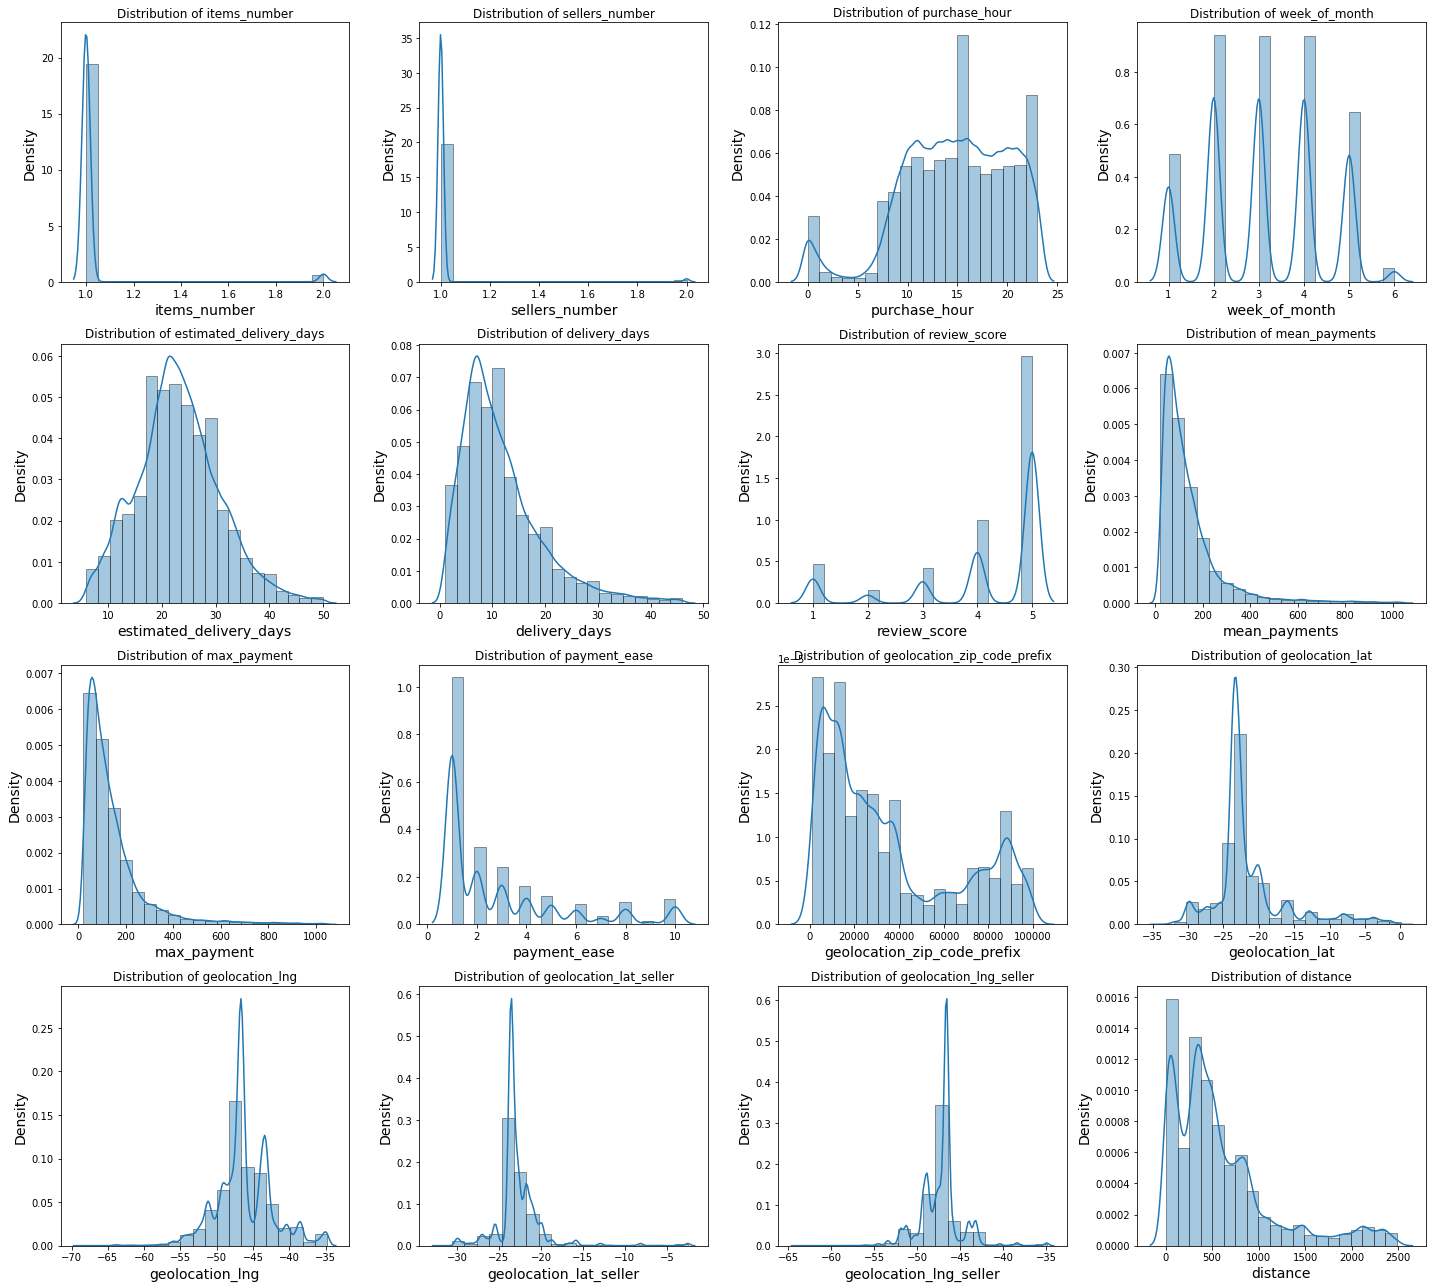

In [ ]:
import seaborn as sns
numerical_col=data.select_dtypes(include=np.number).columns
fig=plt.figure(figsize=(20,18))
for i, col in enumerate(numerical_col):
  fig.add_subplot(4,4,i+1)
  sns.distplot(data[col],bins=20,hist_kws=dict(edgecolor="black", linewidth=1))
  plt.xlabel(col,fontsize=14)
  plt.ylabel('Density',fontsize=14)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()

We have better shape for our numerical features after the several transformations we have made

In [ ]:
numerical_col=data.select_dtypes(include=np.number).columns
numerical_col


Index(['items_number', 'sellers_number', 'purchase_hour', 'week_of_month',
       'estimated_delivery_days', 'delivery_days', 'review_score',
       'mean_payments', 'max_payment', 'payment_ease',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_lat_seller', 'geolocation_lng_seller', 'distance'],
      dtype='object')

In [ ]:
def get_percentile(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
#categorical_distribution
def categorical_plot1(df,feature):
  feature_dt=df[feature].value_counts(ascending=False).head(20)
  plt.figure(figsize=(8,6))
  g=sns.countplot(feature,data=df,order=feature_dt.index.values)
  plt.xticks(rotation=70)
  get_percentile(g,df[feature])
  plt.show()



In [ ]:
#pie_chart
def categorical_plot2(df,feature):

  fig=plt.figure(figsize=(10,8))

  pie_data=df[feature].value_counts(normalize=True)
    
  explode=pie_data.apply(lambda x:(x>=0.5) | (x<=0.1))
  explode=explode.apply(lambda x:0.05 if x==True else 0)
  legend=pie_data.index.values
  plt.pie(pie_data.mul(100),labels=pie_data.index.values,shadow=False,explode=explode,startangle=90,rotatelabels=True, autopct='%1.1f%%',textprops={'fontsize': 13})
  plt.title(f'distribution de {feature}',{'fontsize':20})
  plt.legend(legend,loc='center left')


  plt.show()

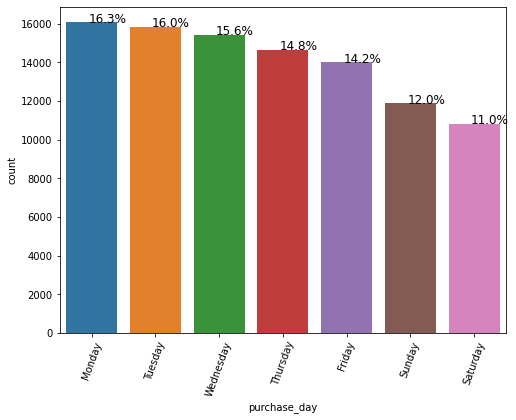

In [ ]:
categorical_plot1(data,'purchase_day')

we notice that the clients made the most of their online orders in the beginning of the week

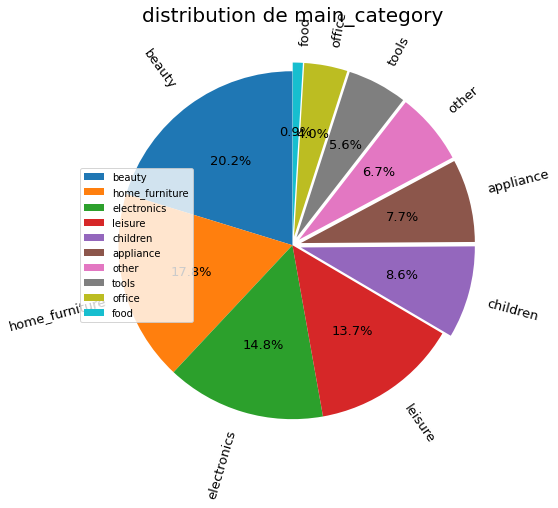

In [ ]:
categorical_plot2(data,'main_category')

the three top categories our clients are interested in are: 

- Electronics

- Beauty

- Home furniture

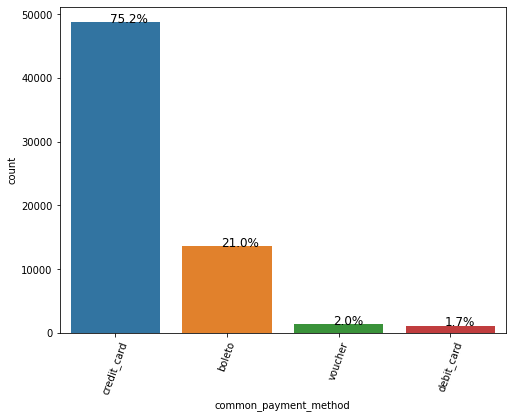

In [ ]:
categorical_plot1(data,'common_payment_method')

as it was expected the common payment method to our client is the credit card 

followed by the boleto which is a common method to pay in Brazil

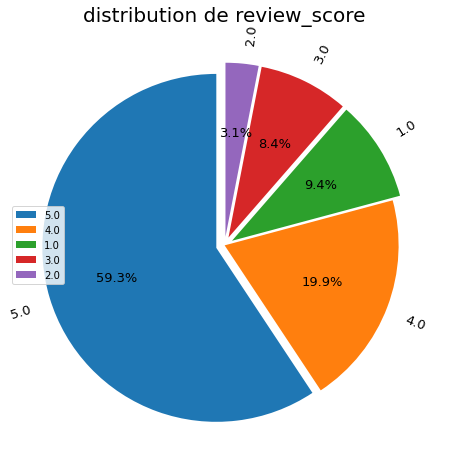

In [ ]:
categorical_plot2(data,'review_score')

we have a good review score for over 50%  of our orders

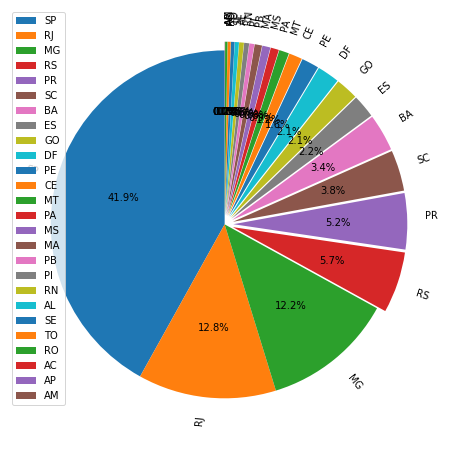

In [ ]:
categorical_plot2(data,'customer_state')

Sao paolo and Rio de Janeiro are the top states 

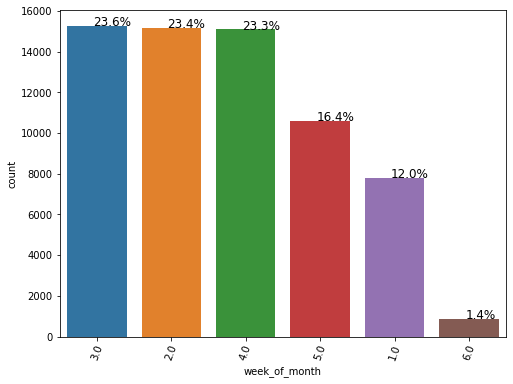

In [ ]:
categorical_plot1(data,'week_of_month')

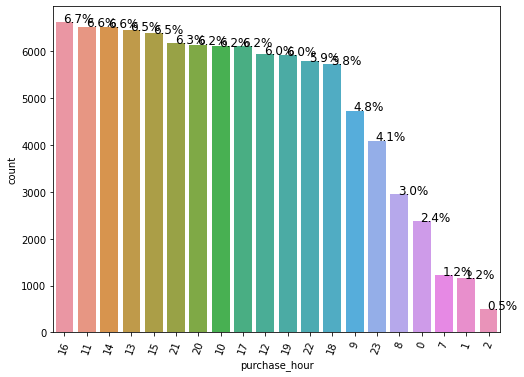

In [ ]:
categorical_plot1(data,'purchase_hour')

the best hours to made a sell are (16h , 11h, 14h,  13h, 15h) 

our client tends to pass their order in the middle of the day (while working maybe :D )

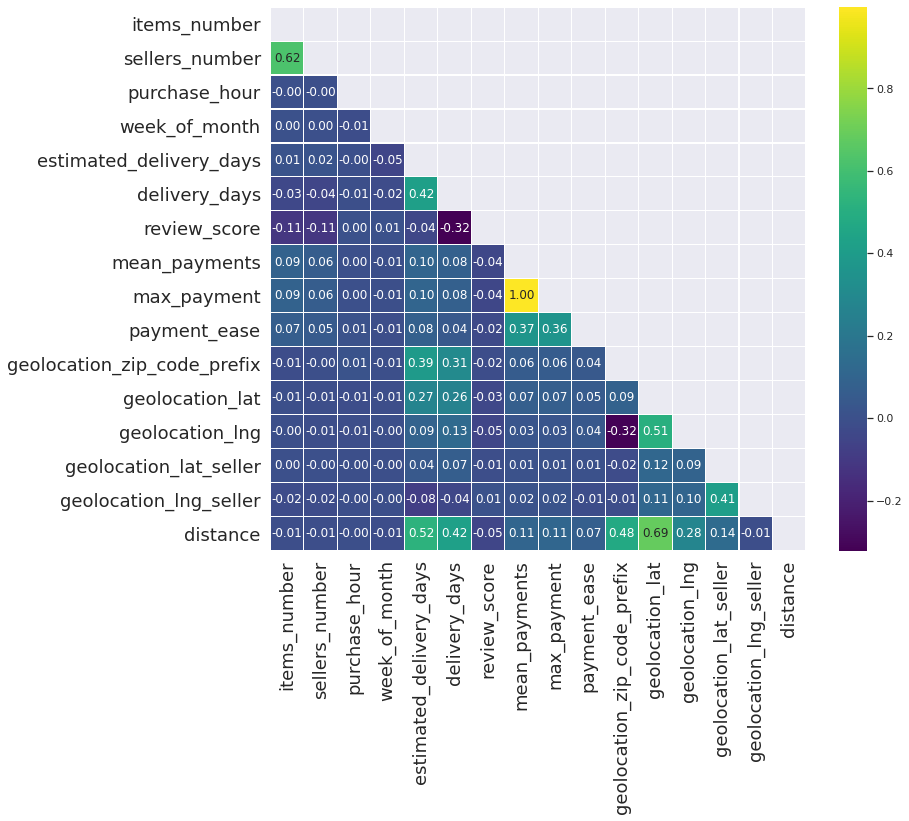

In [ ]:
plt.figure(figsize=(12,10))
Mask=np.triu(np.ones_like(data.corr()))
c=sns.heatmap(data.corr(),cmap='viridis',annot=True,linewidths=0.1,cbar=True,mask=Mask,fmt='.2f')
c.set_xticklabels(c.get_xmajorticklabels(), fontsize = 18)
c.set_yticklabels(c.get_ymajorticklabels(), fontsize = 18)


plt.show()

### **Observations**


- very high correlation between **max_payment*** and **mean_payment** (we should keep only one of them)

- good correlation between the number of **items** and the **sellers** 

- also between **distance** and **lat/long**

### Save data

In [ ]:
data=data.set_index('customer_id')

In [ ]:
from google.colab import files
data.to_csv('data.csv') 
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>